In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
df = pd.read_csv('medical_examination.csv')
df.set_index('id',inplace=True)
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   sex          70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [37]:
df['overweight'] = df['weight'] / ((df['height'] / 100) ** 2) > 25
df['overweight'] = df['overweight'].astype(int)
df.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [38]:
result_gluc = df['gluc'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = result_gluc
result_chol = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['cholesterol'] = result_chol
df.head()


,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


C:\Users\Kazan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


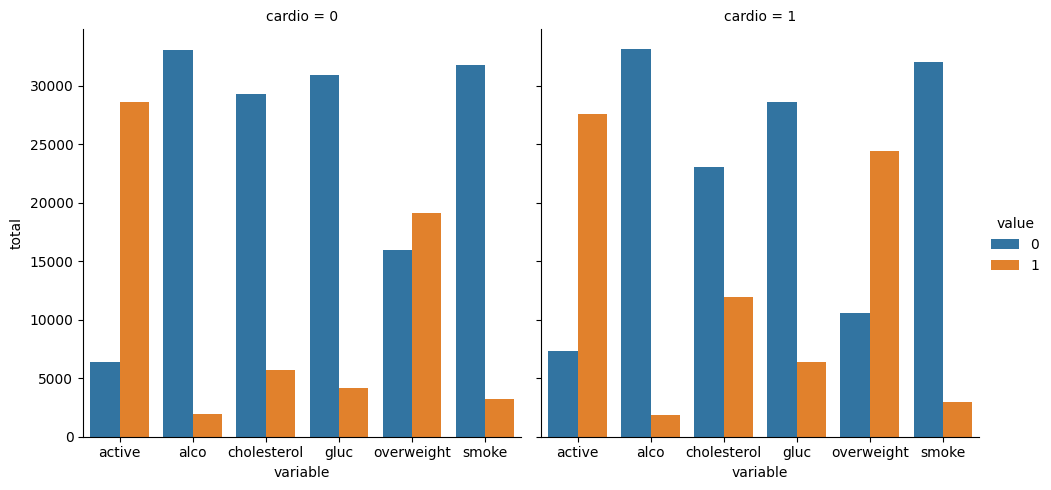

In [75]:
df_cat = pd.melt(df,id_vars = 'cardio', value_vars= ['cholesterol','gluc','smoke','alco','active','overweight'])
#print(df_cat.head())
df_cat['total'] = 1
df_cat = df_cat.groupby(['cardio','variable','value'],as_index=False).count()
#print(df_cat.head())
plot = sns.catplot(data=df_cat,x='variable', y = 'total', kind='bar',col='cardio', hue='value')
plot.fig.savefig('HistPlot.png')

In [62]:
df_filtered = df[df['ap_lo'] <= df['ap_hi']]
df_filtered = df[(df['height'] >= df['height'].quantile(0.025))]
df_filtered = df[(df['height'] <= df['height'].quantile(0.975))]
df_filtered = df[(df['weight'] >= df['weight'].quantile(0.025))]
df_filtered = df[(df['weight'] <= df['weight'].quantile(0.975))]
df_filtered.head()

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


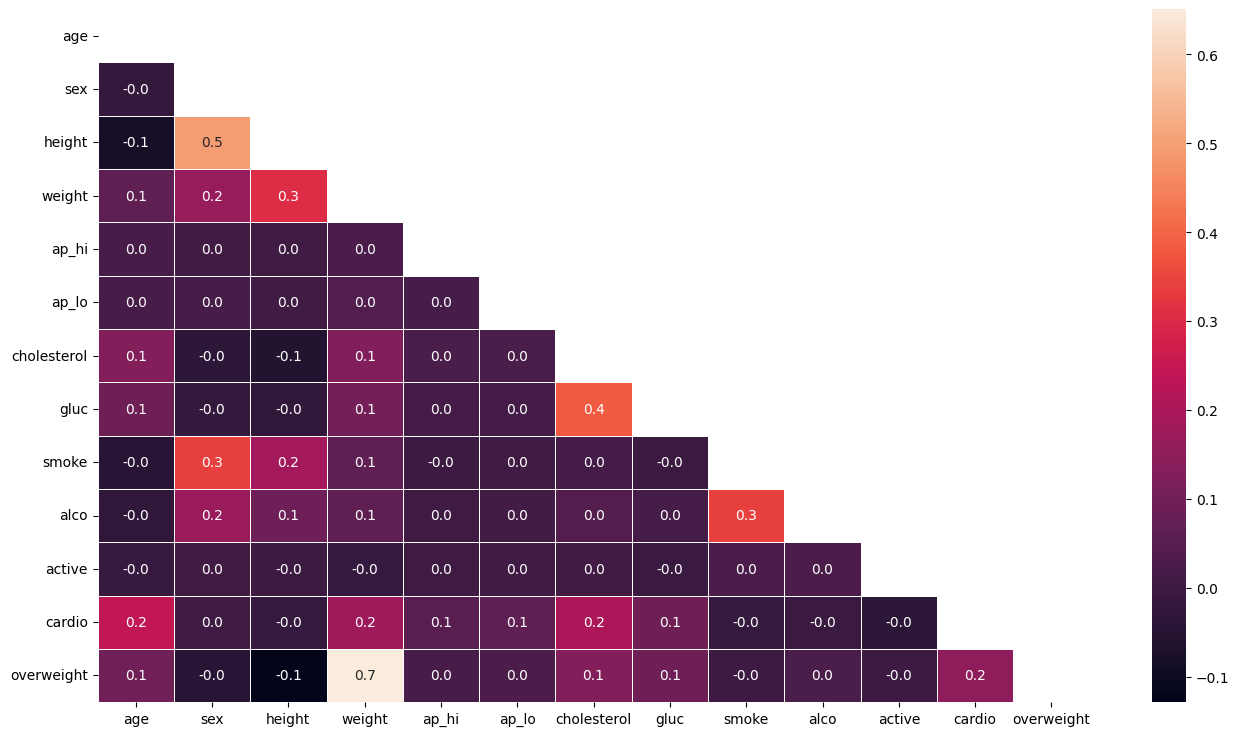

In [73]:
corr_matrix = df_filtered.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
fig, ax= plt.subplots(figsize=(16, 9))
sns.heatmap(corr_matrix,mask= mask, linewidths=0.5, annot=True, fmt="0.1f")
fig.savefig("heatmap.png")